<a href="https://colab.research.google.com/github/jayantMalhotra28/Walmart-Kaggle-Challange/blob/main/Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opendatasets --upgrade 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Libraries to import dataset from Kaggle and read zip files
import opendatasets as od
import os
from zipfile import ZipFile

In [3]:
# Importing dataset, you will need Kaggle account to do so
dataset_url = 'https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting'
od.download('https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jayantmalhotra2
Your Kaggle Key: ··········


100%|██████████| 2.70M/2.70M [00:00<00:00, 59.4MB/s]


Extracting archive ./walmart-recruiting-store-sales-forecasting/walmart-recruiting-store-sales-forecasting.zip to ./walmart-recruiting-store-sales-forecasting


In [4]:
os.listdir('walmart-recruiting-store-sales-forecasting') # Listing imported files

['features.csv.zip',
 'stores.csv',
 'train.csv.zip',
 'sampleSubmission.csv.zip',
 'test.csv.zip']

In [5]:
# Importing important libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Reading zip folders
train_zip_file = ZipFile('walmart-recruiting-store-sales-forecasting/train.csv.zip')
features_zip_file = ZipFile('walmart-recruiting-store-sales-forecasting/features.csv.zip')
test_zip_file = ZipFile('walmart-recruiting-store-sales-forecasting/test.csv.zip')
sample_submission_zip_file = ZipFile('walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip')

In [7]:
# Reading files inside zip folder
train_df = pd.read_csv(train_zip_file.open('train.csv'))
features_df = pd.read_csv(features_zip_file.open('features.csv'))
stores_df = pd.read_csv('walmart-recruiting-store-sales-forecasting/stores.csv')
test_df = pd.read_csv(test_zip_file.open('test.csv'))
submission_df = pd.read_csv(sample_submission_zip_file.open('sampleSubmission.csv'))

In [8]:
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [9]:
features_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [10]:
stores_df

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [56]:
# Lookinh on the above 3 dataframe , it is clear we need all rows from train_df, so we will do a left outer join of train_df table with feature and store table
dataset = train_df.merge(stores_df, how='left').merge(features_df, how='left')
test_dataset = test_df.merge(stores_df, how='left').merge(features_df, how='left')

In [57]:
# Lets see datatypes of our features and target variable
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [58]:
# More info on our dataset
dataset.describe(include = 'all')
# One important obsevation - we have neagtive weekely sales which is not possible so later in data-preprocessing step, 
# we will either remove the rows having negative weekly sales or make them 0, depending upon their size 

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570,421570.000000,421570,421570,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
unique,NaN,NaN,143,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2011-12-23,NaN,False,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,3027,NaN,391909,215478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,22.200546,44.260317,NaN,15981.258123,NaN,NaN,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,NaN,22711.183519,NaN,NaN,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,NaN,-4988.940000,NaN,NaN,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,NaN,2079.650000,NaN,NaN,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,NaN,7612.030000,NaN,NaN,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,NaN,20205.852500,NaN,NaN,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000


In [59]:
# Checking the NaN values in each variable
dataset.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [60]:
# Checking the NaN percentage
dataset.isnull().mean() * 100
# The null percentage is very large so we will not drop null rows, later on we will update these null values with either 0 or avg value of the column.

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Type             0.000000
Size             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
dtype: float64

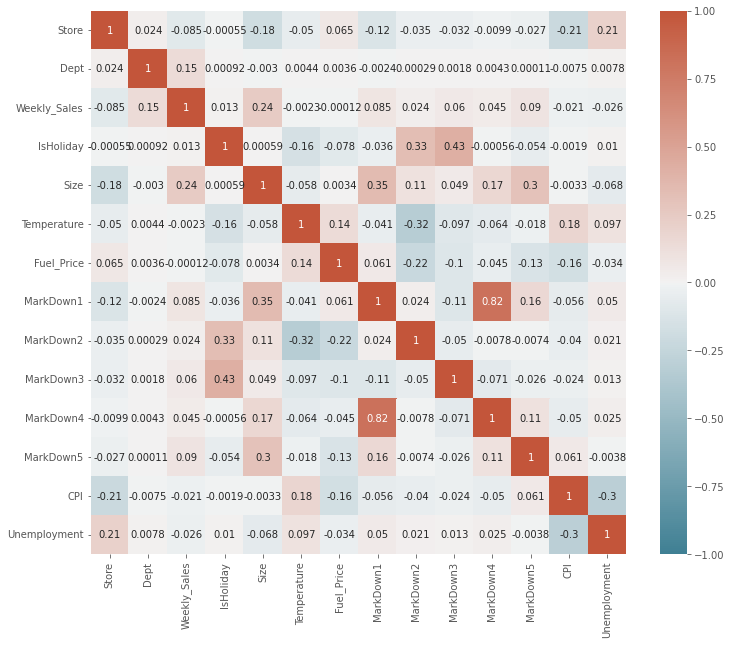

In [61]:
# Input Variables Correlation with the output feature Weekly_Sales
corr = dataset.corr()
cmap = sns.diverging_palette(220, 20, as_cmap=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap = cmap)
plt.show()
# By watching the correlation matrix, we can see that Weekly_Sales have a higher correlation with Store, Dept and Size.

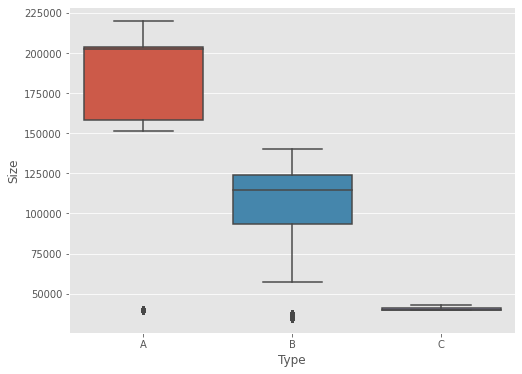

In [62]:
# Lets visulaize the different type of stores we have 
store_type = pd.concat([dataset['Type'], dataset['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=store_type)
# By boxplot, we can see that type A store is the largest store and C is the smallest and there is no overlap between them

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


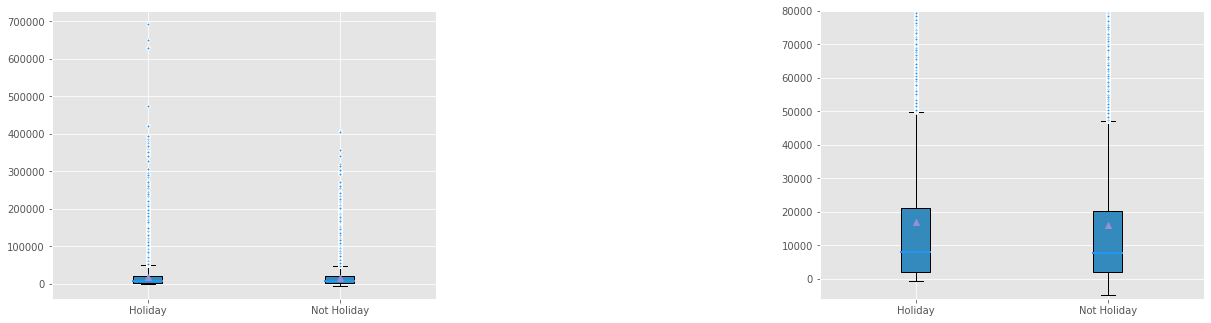

In [63]:
# Lets try to vizualize the sales on Holiay vs Not-Holiday days
plt.style.use('ggplot')
fig, axes = plt.subplots(1,2, figsize = (20,5))
fig.subplots_adjust(wspace=1, hspace=1)
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

sales_holiday=dataset[['IsHoliday','Weekly_Sales']]
target=[sales_holiday['Weekly_Sales'].loc[sales_holiday['IsHoliday']==True],sales_holiday['Weekly_Sales'].loc[sales_holiday['IsHoliday']==False]]
labels=['Holiday','Not Holiday']

#median
medianprop={'color':'#2196F3',
            'linewidth': 2,
            'linestyle':'-'}
# outliers

flierprop={'color' : '#EC407A',
          'marker' : 'o',
          'markerfacecolor': '#2196F3',
          'markeredgecolor':'white',
          'markersize' : 3,
          'linestyle' : 'None',
          'linewidth' : 0.1}



axes[0].boxplot(target,labels=labels, patch_artist = 'Patch',
                  showmeans=True,
                  flierprops=flierprop,
                  medianprops=medianprop)


axes[1].boxplot(target,labels=labels, patch_artist = 'Patch',
                  showmeans=True,
                  flierprops=flierprop,
                  medianprops=medianprop)

axes[1].set_ylim(-6000,80000)

plt.show()
# By the below box plot we can see sales on holiday is a little bit more than sales in not-holiday

In [64]:
# Data Manipulation
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [66]:
# Remember there were some negative values in the Weekly sales , lets see thier percentage in order to decide what to do with those observations 
print(len(dataset[dataset['Weekly_Sales'] <=0])/len(dataset)*100)

0.3221291837654482


In [67]:
dataset = dataset.loc[dataset['Weekly_Sales'] >=0]         # Since % of observations with negative weekly sales are very less we can drop these observations 
dataset[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = dataset[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0) # Making missing values to 0 in markdowns
# Need to break date into yy to feed ML model
dataset['Year'] = pd.to_datetime(dataset['Date']).dt.year
dataset['Month'] = pd.to_datetime(dataset['Date']).dt.month
dataset['Week'] = pd.to_datetime(dataset['Date']).dt.isocalendar().week
dataset = dataset.drop(columns=["Date", "CPI", "Fuel_Price", 'Unemployment', 'Temperature']) # Since all these features had very very less correlation with weekly sales, seen in above heatmap, therefor removing them to dec complexity.
# making weeekly sales as last feature , sorry have a habit with this :)))
df = dataset.pop('Weekly_Sales')
dataset['Weekly_Sales'] = df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [68]:
dataset.info()
# We need to encode bool and object features , also we need to encode Store feature else ML model will give higher prefernce to store with higher number , but that is not the case

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420285 entries, 0 to 421569
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         420285 non-null  int64  
 1   Dept          420285 non-null  int64  
 2   IsHoliday     420285 non-null  bool   
 3   Type          420285 non-null  object 
 4   Size          420285 non-null  int64  
 5   MarkDown1     420285 non-null  float64
 6   MarkDown2     420285 non-null  float64
 7   MarkDown3     420285 non-null  float64
 8   MarkDown4     420285 non-null  float64
 9   MarkDown5     420285 non-null  float64
 10  Year          420285 non-null  int64  
 11  Month         420285 non-null  int64  
 12  Week          420285 non-null  UInt32 
 13  Weekly_Sales  420285 non-null  float64
dtypes: UInt32(1), bool(1), float64(6), int64(5), object(1)
memory usage: 44.1+ MB


In [90]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,-1].values

In [91]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('one_hot_encoder', OneHotEncoder(), [0,2,3])], remainder='passthrough')
X = ct.fit_transform(X)

In [92]:
X.shape

(420285, 60)

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [94]:
# Multiple Linear Regression

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [95]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

R2_score = r2_score(y_test, y_pred)
MSE      = mean_squared_error(y_test, y_pred,squared = False)
Adjusted_R_score = 1 - (( 1-R2_score)*( len(dataset) - 1 )) / ( len(dataset) - dataset.shape[1] - 1 )

print("R2_Score: ", R2_score)
print("Adjusted R score: ", Adjusted_R_score)
print("MSE: ",MSE)

R2_Score:  0.12016099205257391
Adjusted R score:  0.12013168292722287
MSE:  21340.370448959155


In [96]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(random_state = 0)
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)

In [97]:
R2_score = r2_score(y_test, y_pred)
MSE      = mean_squared_error(y_test, y_pred,squared = False)
Adjusted_R_score = 1 - (( 1-R2_score)*( len(dataset) - 1 )) / ( len(dataset) - dataset.shape[1] - 1 )

print("R2_Score: ", R2_score)
print("Adjusted R score: ", Adjusted_R_score)
print("MSE: ",MSE)

R2_Score:  0.9628725628615243
Adjusted R score:  0.9628713260753632
MSE:  4383.770739167272


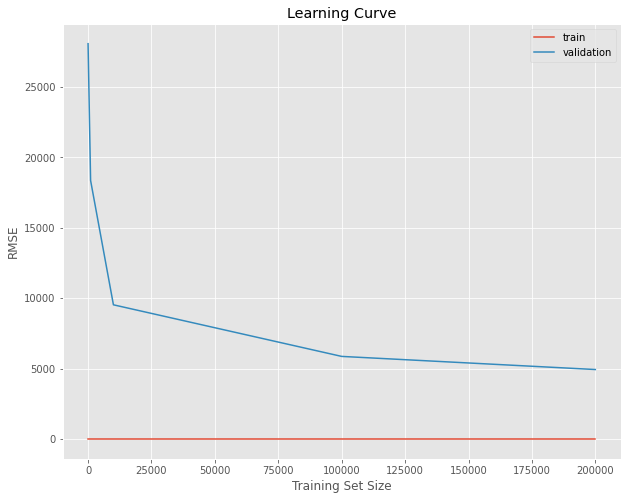

In [99]:
# Lets see the learning curve for Decision Tree
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    estimator=DecisionTreeRegressor(random_state = 0),
    X=X_train,
    y=y_train,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes = [1, 1000, 10000, 100000, 200000]
)

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend(loc="best")

plt.show()

# We can see that as the sample size increases , learning rate increases

In [100]:
# Random Forest Tree
from sklearn.ensemble import RandomForestRegressor
RFT = RandomForestRegressor(n_estimators = 10, random_state = 0)
RFT.fit(X_train, y_train)
y_pred = RFT.predict(X_test)

In [101]:
R2_score = r2_score(y_test, y_pred)
MSE      = mean_squared_error(y_test, y_pred,squared = False)
Adjusted_R_score = 1 - (( 1-R2_score)*( len(dataset) - 1 )) / ( len(dataset) - dataset.shape[1] - 1 )

print("R2_Score: ", R2_score)
print("Adjusted R score: ", Adjusted_R_score)
print("MSE: ",MSE)

R2_Score:  0.9762463169545763
Adjusted R score:  0.976245525673822
MSE:  3506.4352724125624


In [102]:
# Need to do same data engineerng on Test set
test_dataset[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = test_dataset[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
test_dataset['Year'] = pd.to_datetime(test_dataset['Date']).dt.year
test_dataset['Month'] = pd.to_datetime(test_dataset['Date']).dt.month
test_dataset['Week'] = pd.to_datetime(test_dataset['Date']).dt.isocalendar().week
test_dataset = test_dataset.drop(columns=["Date", "CPI", "Fuel_Price", 'Unemployment', 'Temperature']) 

In [103]:
X = test_dataset.values

In [104]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('one_hot_encoder', OneHotEncoder(), [0,2,3])], remainder='passthrough')
X = ct.fit_transform(X)

In [105]:
y_pred_kaggle = RFT.predict(X) # predicting with the best model

In [106]:
submission_df['Weekly_Sales'] = y_pred_kaggle

In [108]:
submission_df.to_csv('submission3.csv', index=False)